In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.decomposition import PCA

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [60]:
data = pd.read_csv('student-mat.csv', delimiter = ';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [61]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [63]:
cat_df = data.select_dtypes(include = 'object')       #selecting categorical columns
num_df = data.select_dtypes(include = np.number)      #selecting numerical columns
cat_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [64]:
non_binary_cols = ['Mjob','Fjob','reason','guardian']    # categorical columns with more tha two categorical values
binary_cols = [col for col in cat_df.columns if col not in non_binary_cols] # categorical columns with only two values

binary_catdf = cat_df[binary_cols]
non_binary_catdf = cat_df[non_binary_cols]

num_df1 = binary_catdf.apply(LabelEncoder().fit_transform) # encoding binary columns 

one_enc = OneHotEncoder()
num_df2 = pd.DataFrame(one_enc.fit_transform(non_binary_catdf).toarray(),
                       columns = one_enc.get_feature_names_out())         # encoding non binary columns

In [65]:
encoded_df = pd.concat([num_df, num_df1, num_df2], axis = 1)

Y_df = encoded_df['G3']
X_df = encoded_df.drop('G3', axis =1)

Text(0, 0.5, 'Cumulative Explained Variance ')

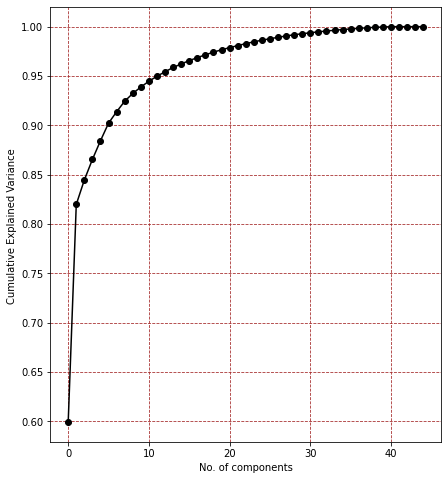

In [80]:
pca = PCA()
pca.fit(X_df)

plt.figure(figsize = (7,8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', color = 'k')
plt.grid(color = 'brown', linestyle = 'dashed')
plt.xlabel('No. of components')
plt.ylabel('Cumulative Explained Variance ')

In [81]:
pca = PCA(n_components = 5)
pca_X_df = pd.DataFrame(pca.fit_transform(X_df))

In [82]:
X_train,X_test,Y_train,Y_test = train_test_split(pca_X_df, Y_df, test_size = 0.3)

0.8279465604966152


Text(0, 0.5, 'Predicted G3')

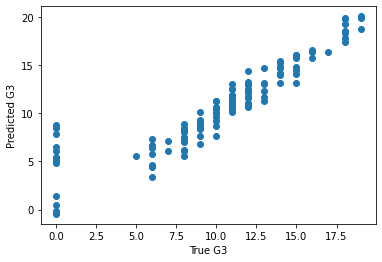

In [83]:
model1 = LinearRegression()

model1.fit(X_train,Y_train)
print(model1.score(X_test, Y_test))
Y_pred = model1.predict(X_test)
plt.scatter(Y_test,Y_pred)
plt.xlabel('True G3')
plt.ylabel('Predicted G3')

0.6331749811391927


Text(0, 0.5, 'Predicted G3')

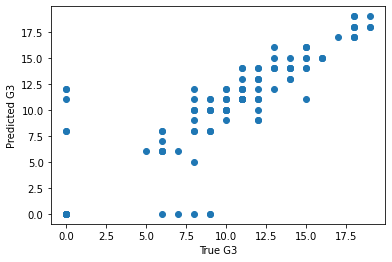

In [84]:
model2 = DecisionTreeRegressor()
model2.fit(X_train,Y_train)

print(model2.score(X_test, Y_test))
Y_pred = model2.predict(X_test)
plt.scatter(Y_test,Y_pred)
plt.xlabel('True G3')
plt.ylabel('Predicted G3')

0.8487353942033559


Text(0, 0.5, 'Predicted G3')

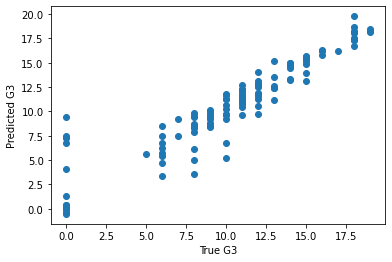

In [85]:
model3 = GradientBoostingRegressor()

model3.fit(X_train,Y_train)
print(model3.score(X_test, Y_test))
Y_pred = model3.predict(X_test)

plt.scatter(Y_test,Y_pred)

plt.xlabel('True G3')
plt.ylabel('Predicted G3')

0.7793027834328168


Text(0, 0.5, 'Predicted G3')

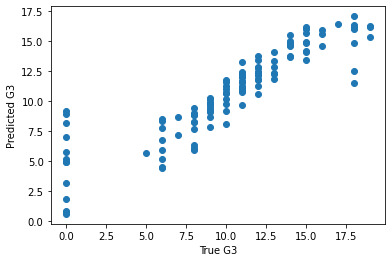

In [86]:
model4 = svm.SVR()

model4.fit(X_train, Y_train)
print(model4.score(X_test, Y_test))
Y_pred = model4.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel('True G3')
plt.ylabel('Predicted G3')

In [94]:
all_models = [model1, model2, model3, model4]

In [100]:
report = []
for model in all_models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    rmse = mean_squared_error(Y_test, y_pred, squared = True)
    mae = mean_absolute_error(Y_test, y_pred)
    report.append([r2, mae, rmse])

In [102]:
model_names = ['Linear Regression', 'Decision Tree \n Regression', 'Gradient \nBoosting Regressor', 'Support Vector']
report_df = pd.DataFrame(report, columns = ['R² Score','Mean Absolute Error','RMSE'])
report_df['Regression Models'] = model_names
report_df = report_df.set_index('Regression Models')
report_df = report_df.sort_values(by =  'R² Score', ascending = False)

In [103]:
report_df

,R² Score,Mean Absolute Error,RMSE
Regression Models,,,
Gradient \nBoosting Regressor,0.850921,1.147601,3.572260
Linear Regression,0.827947,1.216518,4.122770
Support Vector,0.779303,1.471722,5.288380
Decision Tree \n Regression,0.706470,1.504202,7.033613


<AxesSubplot:title={'center':'Regression Models Comparison Mathematics Dataset'}>

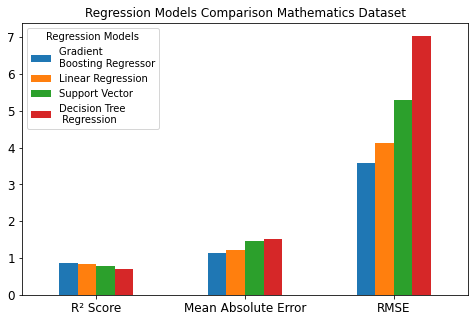

In [104]:
report_df.transpose().plot(kind = 'bar', figsize = (8,5), fontsize = 12, rot = 0,
               title = 'Regression Models Comparison Mathematics Dataset')